# Ottimizzazione del portafoglio

Partiamo dalle basi di quello che sembra una magia, supponiamo di avere due assett **A** e **B** con i seguenti rendimenti e varianza:

| Assett | Rendimento    | Rischio/Dev Standard  |
|-------| ------------- | ------------- |
|A | 4             | 10            |
|B | 6             | 14            |


La domanda che mi pongo ora è la seguente, quale sarà il rendimento / rischio di un portafoglio che è la combinazione dei due assett ?

Partiamo dalle cose semplici quale sarà il rendimento e il rischio di un portafoglio composto al 100% da A? (Ovvio sarà i valore della riga A)


Ora complichiamo un pochino le cose quale sarà il rischio e il rendimento di un portafoglio al 50% composto da A e al 50% composto da B? 

Portemmo dare una risposta ragionevole dicendo che il rendimento sarà la media ponderata dei di rendimenti il 5% e stessa cosa il rischio pari ad un 12%. 
La cosa non è propriamente corretta,per il rendimento possiamo usare la media ma per la parte del rischio non possiamo!

Con le informazioni in nostro possesso non possiamo rispondere correttamente ci manca un dato fondamentale, non sappiamo quanto A e B sono correlati tra loro. 

Se i due assett sono perfettamente correlati si comporterebbero come una cosa sola e sarebbe perfetto calcolare la media dei due, ma se questi due non lo sono potremmo vedere un Assett scendere e l'altro salire dunque la combinazione dei due potrebbe essere minore di quel che si pensa. Questa è la magia della costruzione del portafoglio.

Supponiamo che la correlazione tra i due assett sia pari a $\rho_{(a,b)} = 0.4$.

Supponiamo anche di impostare i pesi dei due assett come $w_A$ e $w_B$ il peso $w$ è un numero comporeso tra 0 e 1 allora il rendimento del nostro portafoglio sarà:


$$
R_{(w_a,w_b)} = w_a \times R_a + w_b \times R_b
$$


Il rischio invece è dato dalla formula 

$$
\sigma^2_{(w_a,w_b)} = \sigma^2_{a}w^2{a} + \sigma^2_{b}w^2{b} + 2w_aw_b\sigma_a\sigma_b\rho_{ab}
$$


Prendiamo una lista di pesi e calcoliamo rendimento totale e rischio

In [1]:
import numpy as np
import pandas as pd

wa = np.linspace(0,1,100)
wb = 1 - wa
data = np.column_stack((wa, wb))

In [2]:
df = pd.DataFrame(data=data,columns=['wa','wb'])
df

,wa,wb
0,0.000000,1.000000
1,0.010101,0.989899
2,0.020202,0.979798
3,0.030303,0.969697
4,0.040404,0.959596
...,...,...
95,0.959596,0.040404
96,0.969697,0.030303
97,0.979798,0.020202
98,0.989899,0.010101


Calcoliamo il rendimento

In [3]:
reta = 0.04
retb = 0.06

df['ret'] = df.wa * reta + df.wb * retb

Calcoliamo il rischio

In [4]:
corr = 0.4
sigmaa = 0.1
sigmab = 0.14

df['risk'] = sigmaa * df.wa ** 2 + sigmab * df.wb ** 2 + 2 * df.wa * df.wb * sigmaa * sigmab * corr
df

,wa,wb,ret,risk
0,0.000000,1.000000,0.060000,0.140000
1,0.010101,0.989899,0.059798,0.137308
2,0.020202,0.979798,0.059596,0.134663
3,0.030303,0.969697,0.059394,0.132065
4,0.040404,0.959596,0.059192,0.129513
...,...,...,...,...
95,0.959596,0.040404,0.040808,0.092745
96,0.969697,0.030303,0.040606,0.094489
97,0.979798,0.020202,0.040404,0.096279
98,0.989899,0.010101,0.040202,0.098116


In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

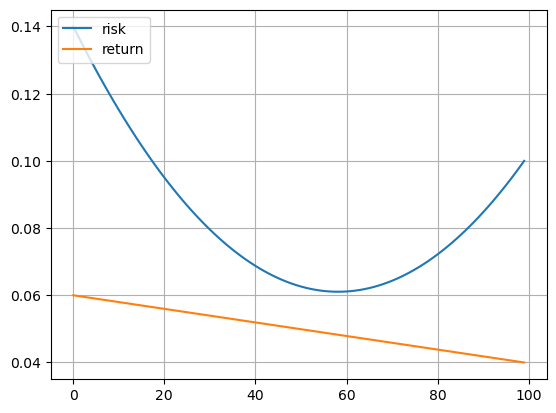

In [6]:
plt.plot(df.index,df['risk'],label='risk')
plt.plot(df.index,df['ret'],label='return')
plt.grid()
plt.legend(loc="upper left")

Vediamo subito che il rischio ha un grafico a forma di curva e addirittura la combinazione dei due Assett ha un rischio minore dei singoli.

Creiamo ora un grafico e mettiamo in correlazione rischio e rendimento

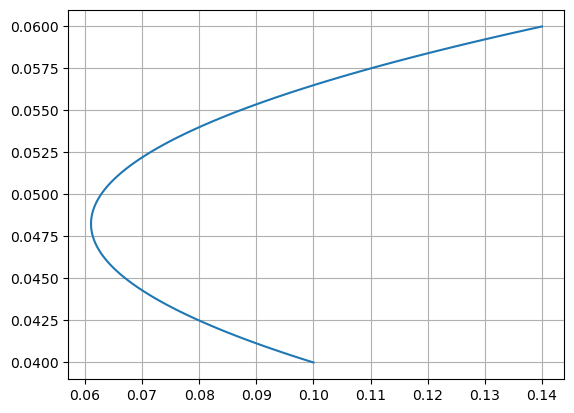

In [7]:
plt.plot(df['risk'],df['ret'])
plt.grid()

Vediamo che esite un punto in cui la volatilità è minima e il rendimento è un valore compreso tra i due, potremmo partire da una delle due estremità e arrivare al punto minimo in quanto se notiamo bene la forma è convessa.
Più i due investimenti sono decorrelati più la curva verrà pronunciata "provate per curiosità a cambiare il valore di corr".

# Frontiera efficiente
Aggiungiamo un terzo asset per complicare un attimino le cose ora possiamo scegliere tra A,B e C creiamo uno schema (attenzione non è lo stesso grafico di prima ma serve per introdurre un concetto).<br/> 
Non avremo più una linea bensi parleremo di regione

![region](./img/03-frontiera.png)


ogni punto all'interno di questa regione rappresenta un portafolio, prendiamo il portafoglio P che rappresenta un punto ora la domanda è investireste in P? <br/>
Spero che la risposta ovviamente sia no in quanto esite Q un portafoglio con rendimento più elevato e stesso rischio.

Diremo che Q è un portafoglio che **domina** P nel senso che a parità di rischio il rendimento è meggiore, ora se ragioniamo esiste un altro portafolio migliore di P, R che a parità di rendimento ha un rischio migliore.
Portando il ragionamento all'estremo diremo che non ha senso scegliere un portafoglio che sta all'iterno della regione ma dovremmo scegliere un punto sulla linea di confine. 
Ecco spiegato il concetto di frontiera efficiente.

## Calcolo della frontiera efficiente

Iniziamo con il calcolare il rendimento totale del portafoglio con $k$ asset.

$$
    R_p = \sum_{i=1}^{k} w_iR_i
$$

Le cose si complicano (lo abbiamo visto prima) nel momento in cui vogliamo calcolare la varianza dell'intero portafoglio.

$$
    \sigma_p^2 = \sum_{i=1}^{k} \sum_{i=j}^{k} w_iw_j\sigma_{i}\sigma_{j}\rho_{ij}
$$

Sappiamo anche che $\sigma_{i}\sigma_{j}\rho_{ij}$ rappresenta la covarianza $\sigma_{ij}$.


$$
    \sigma_p^2 = \sum_{i=1}^{k} \sum_{i=j}^{k} w_iw_j\sigma_{ij}
$$

Facciamo un ulteriore passo e andiamo a riscrivere le formule in notazione vettoriale. Otteremo che:

$$
        R_p = w^\intercal R
$$

Se impostiamo $\Sigma$ la matrice quadrata di covarianza 

$$
        \sigma_p^2 = w^\intercal \Sigma w
$$


Ora il gioco sarà quello di minimizzare la volatilità dato un rendimento per fare questo dobiamo impostare queste equazioni:

$$
    min: \frac{1}{2} w^\intercal \Sigma w
$$

Con i seguenti vincoli:

$$
    w^\intercal R = R_0
$$

$$
    w^\intercal 1 = 1
$$


$$
    w \geq 0
$$

Abbiamo messo un mezzo perchè in questo modo l'ottimizzazione diventa in forma quadratica che può essere usata in un ottimizzatore quadratico.


Cominciamo a cercare di creare i nostri primi portafogli, andiamo a comprendere il concetto di frontiera efficiente su dei veri dati, carichiamo un nuovo dataset sempre ottenuto dal sito di Ken French questo dataset contiene 30 portafogli industriali (ponderati in base al valore) con i rendimenti mensili

In [8]:
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.columns = ind.columns.str.strip()

In [9]:
ind

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [11]:
import risk as rk

In [12]:
rk.var_gaussian(ind[["Food", "Beer", "Smoke"]], modified=True)

Food     0.064036
Beer     0.038017
Smoke    0.083784
dtype: float64

<Axes: >

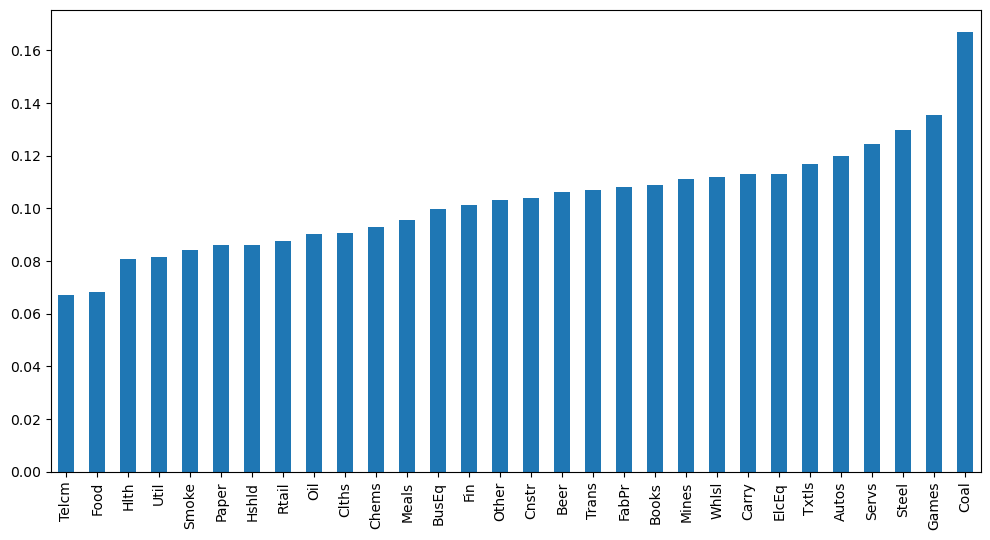

In [13]:
rk.var_gaussian(ind).sort_values().plot.bar(figsize=(12,6))

Creaiamoci delle funzioni di utilità al fine di calcolare:
* Il rendimento annualizzato
* La volatilità annualizzata
* lo Sharpe ratio

In [14]:
def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

In [15]:
def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

In [16]:
def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

<Axes: title={'center': 'Industry Sharpe Ratio from 1926 to 2018'}>

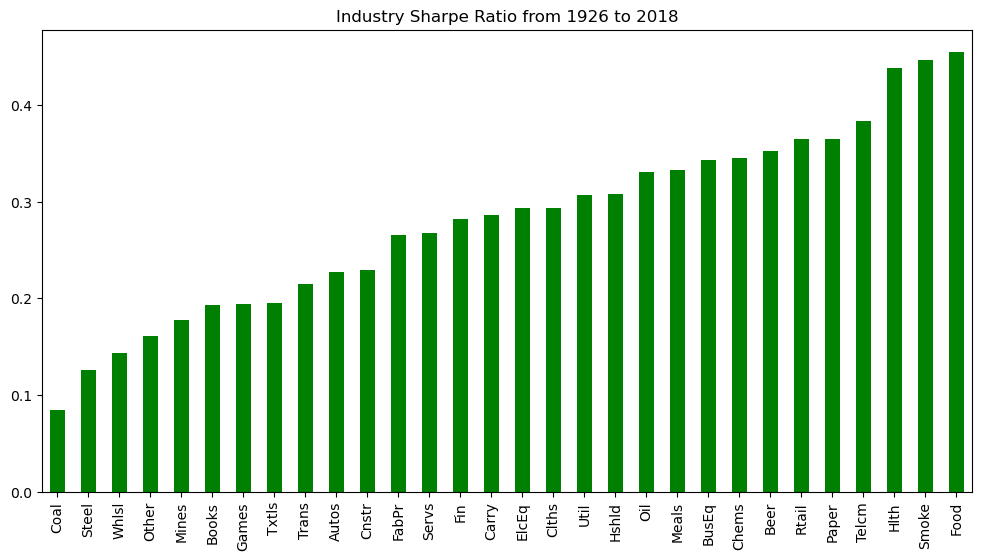

In [17]:
sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratio from 1926 to 2018",color='Green',figsize=(12,6))

Dal grafico vediamo che il settore carbonifero ha in indice di sharpe mediocre mentre il settore Food, Smoke e Healtcare hanno rapporti rischio rendimento interessanti.

Analizziamo i dati su un periodo più ristretto ad esempio dal 2000 in poi

<Axes: title={'center': 'Industry Sharpe Ratio from 2000 to 2018'}>

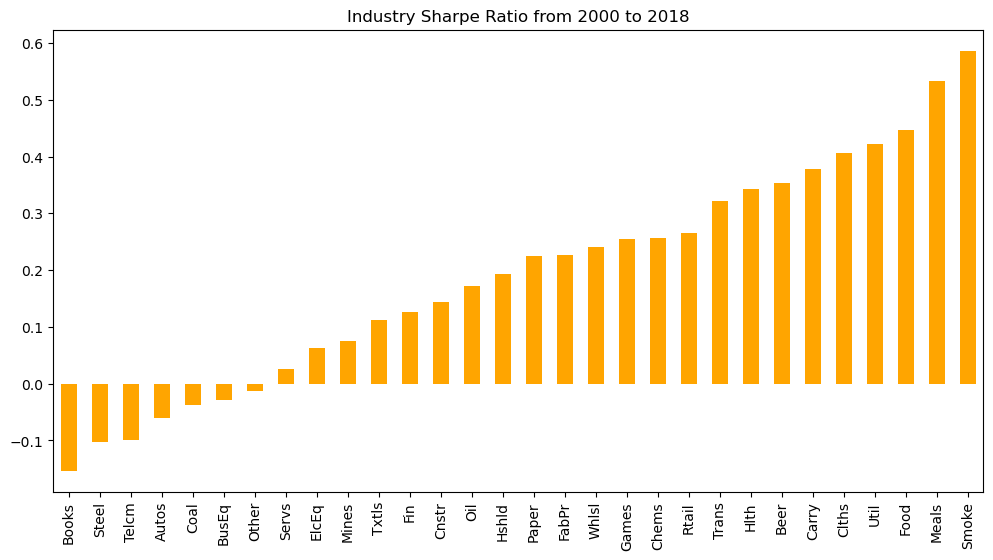

In [18]:
sharpe_ratio(ind['2000':], 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratio from 2000 to 2018",color='Orange',figsize=(12,6))

Qui addirittura otteniamo valoti sharp ratio negativo, non buono in quanto significa che il rendimento è minore del risk free, passiamo al calcolo della frontiera efficiente.<br/> 
Per farlo abbiamo bisogno di due cose:

* Una serie di rendimenti attesi
* La matrice di covarianza

La vera domanda è come si calcolano i rendimenti attesi? In questo momento non abbiamo la strumentazione necessaria, per ora limitiamoci ad usare la serie storica.

Dunque come esercizio proviamo a calcolare la frontiera efficiente che va dal periodo 1995 al 2000 come prima calcoliamo il rendimento atteso (in realtà si tratta di un rendimento reale ma facciamo questo per esercizio)

<Axes: title={'center': 'Industry Returns from 1995 to 2000'}>

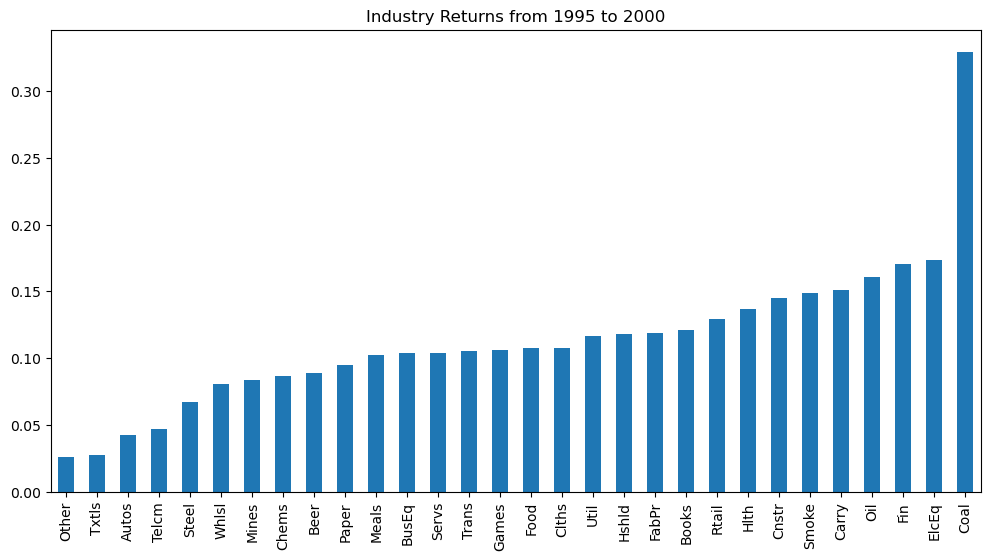

In [29]:
val = ind['1995':'2005']

er = annualize_rets(val,12)
er.sort_values().plot.bar(title="Industry Returns from 1995 to 2000",figsize=(12,6))

Come secondo passo calcoliamo la matrice di covarianza

<Axes: >

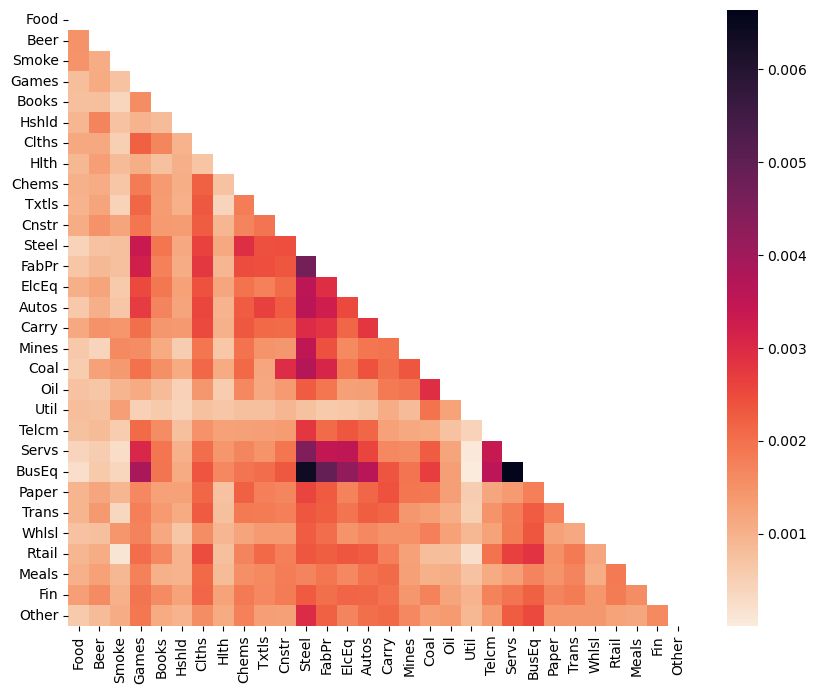

In [30]:
import seaborn as sns
cov = val.cov()

mask = np.zeros_like(cov, dtype=bool)
mask[np.triu_indices_from(cov)] = True

plt.figure(figsize=(10, 8))
sns.heatmap(cov,mask=mask, annot=False, cmap='rocket_r')

Ora come detto prima vorremmo creare il grafico rendimento varianza cominciamo con il creare i valori dell'asse X per farlo useremo la funzione qui sotto

In [31]:
def portfolio_return(weights, returns):
    """
    Computes the return on a portfolio from constituent returns and weights
    weights are a numpy array or Nx1 matrix and returns are a numpy array or Nx1 matrix
    """
    return weights.T @ returns
    

Creiamo lo stesso per la volatilità

In [32]:
def portfolio_vol(weights, covmat):
    """
    Computes the vol of a portfolio from a covariance matrix and constituent weights
    weights are a numpy array or N x 1 maxtrix and covmat is an N x N matrix
    """
    return (weights.T @ covmat @ weights)**0.5

Partiamo dunque analizzando un caso semplice a due dimensioni, analizziamo due settori di mercato:

* Games
* Finance

In [40]:
l = ["Games","Fin"]

In [41]:
er[l]

Games    0.105835
Fin      0.170656
dtype: float64

Estraiamo la matrice di covarianza per i settori desiderati

In [42]:
cov.loc[l,l]

,Games,Fin
Games,0.003767,0.001938
Fin,0.001938,0.002651


cominciamo con il calcolare rischio e rendimento di un portafoglio con tutti i pesi uguali

In [43]:
w = np.repeat(1 / len(l),len(l))
w

array([0.5, 0.5])

In [44]:
portfolio_return(w,er[l])

0.1382458177390946

In [45]:
portfolio_vol(w, cov.loc[l,l])

0.050732588330746425

proviamo ora a visualizzare la frontiera efficiente creando come prima 

In [52]:
n_points = 100
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

In [54]:
rets = [portfolio_return(w, er[l]) for w in weights]
vols = [portfolio_vol(w, cov.loc[l,l]) for w in weights]

<Axes: xlabel='V'>

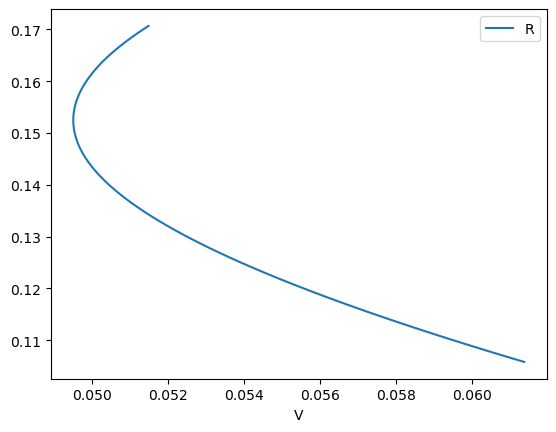

In [56]:
ef = pd.DataFrame({"R": rets, "V": vols})
ef.plot.line(x="V", y="R")

## Frontiera efficiente con N elementi

Alziamo l'asticella è proviamo a visualizzare il grafico rischio rendimento a n elementi

In [57]:
l = ["Smoke", "Fin", "Games", "Coal"]

Creiamo una griglia di pesi la cui somma sia 1

In [62]:
import itertools
n_points = 20
combinations = list(itertools.product(np.linspace(0, 1, n_points),repeat=len(l)))
weights = [np.array(combo) for combo in combinations if sum(combo) == 1]

In [64]:
rets = [portfolio_return(w, er[l]) for w in weights]
vols = [portfolio_vol(w, cov.loc[l,l]) for w in weights]
ef = pd.DataFrame({
    "Returns": rets, 
    "Volatility": vols
})

<Axes: xlabel='Volatility', ylabel='Returns'>

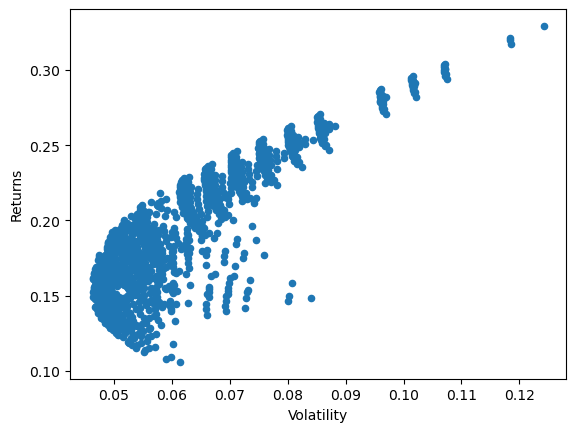

In [66]:
ef.plot.scatter(x="Volatility", y="Returns")

Ovviamente in questo modo non stiamo lavorando in modo effieciente (stiamo provando a caso dei punti), per visualizzare la frontiera quello che dobbiamo fare è dato un rendimento quello che vogliamo e minimizzare la sua volatilità. 

Per fare questo possiamo farci aiutare dalla libreria **scipy.optimize**

In [67]:
from scipy.optimize import minimize

creiamoci dunque la funzione di utilità

In [69]:
def minimize_vol(target_return, er, cov):
    """
    Returns the optimal weights that achieve the target return
    given a set of expected returns and a covariance matrix
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n # an N-tuple of 2-tuples!
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - portfolio_return(weights,er)
    }
    weights = minimize(portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,return_is_target),
                       bounds=bounds)
    return weights.x

ora per avere la frontiera efficiente basterà trovare la combinazione di pesi ottimale per ogni rendimento possibile dal più piccolo al più grande possibile

In [70]:
def optimal_weights(n_points, er, cov):
    """
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs]
    return weights

In [71]:
def plot_ef(n_points, er, cov):
    """
    Plots the multi-asset efficient frontier
    """
    weights = optimal_weights(n_points, er, cov)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame({
        "Returns": rets, 
        "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style='.-')

<Axes: xlabel='Volatility'>

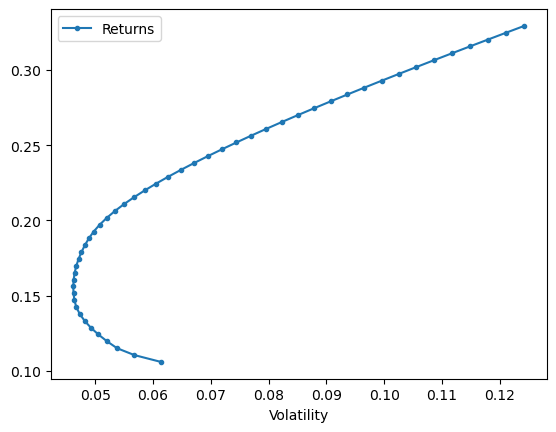

In [72]:
plot_ef(50, er[l], cov.loc[l,l])